In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### State machine

Text(0.5, 1.0, 'text')

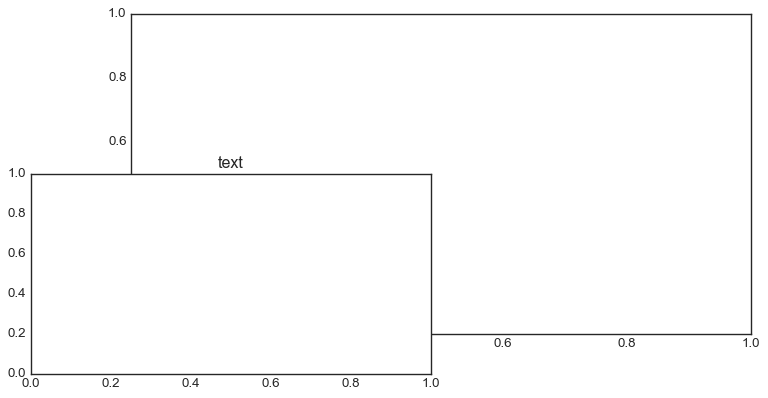

In [48]:
plt.figure(figsize=(10,5)) # 가상 공간 확보

plt.axes() # 실제 그래프가 들어갈 영역
plt.axes((0,0,0.5,0.5)) # 실제 그래프가 들어갈 영역
# plt.axes(polar = True) # 극 좌표계

plt.title('text')

Text(0, 0.5, 'ylabel')

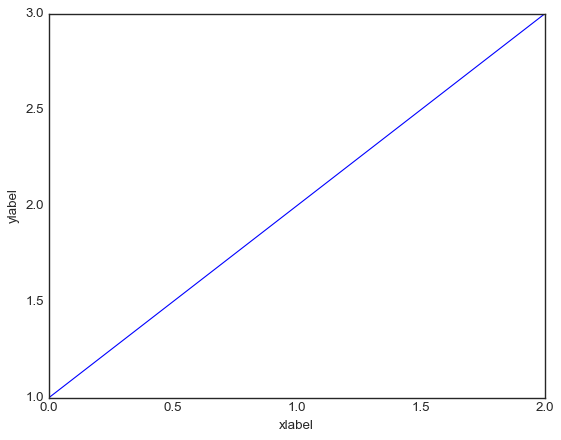

In [62]:
# plt.style.available # style 변경 가능

plt.style.use('tableau-colorblind10')

plt.plot([1,2,3], 'b-')
plt.grid(False)
plt.xlabel('xlabel')
plt.ylabel('ylabel')

# plt.xticks([1,2])
# plt.yticks([2,3])

# plt.xlim([2,3])

In [50]:
import seaborn as sns

iris = sns.load_dataset('iris')

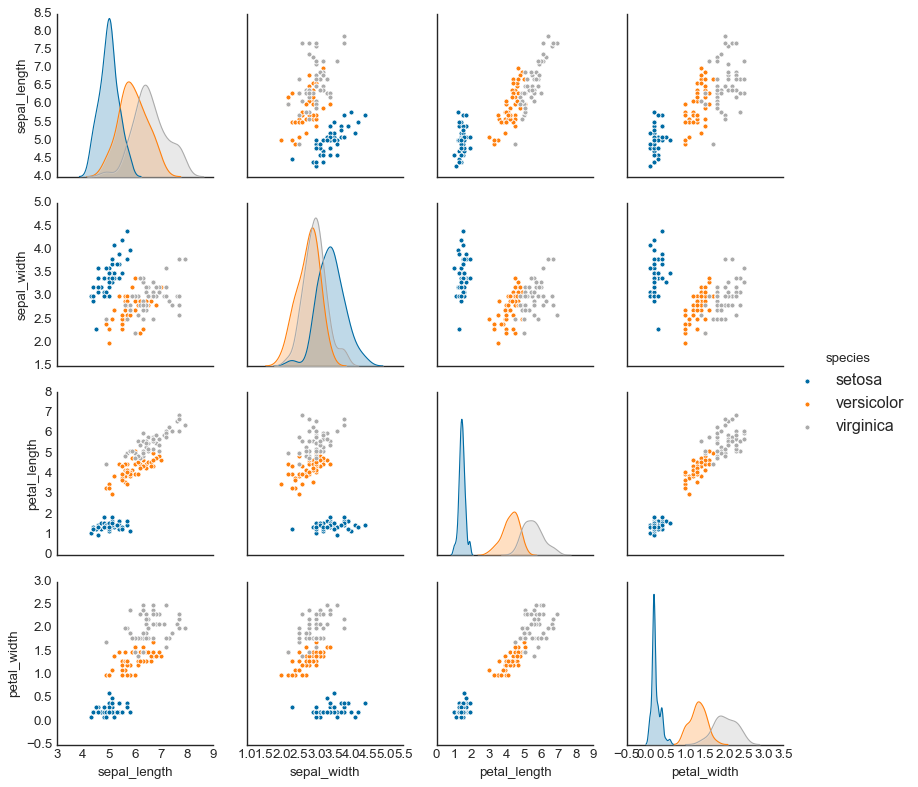

In [51]:
sns.pairplot(iris, hue = 'species')

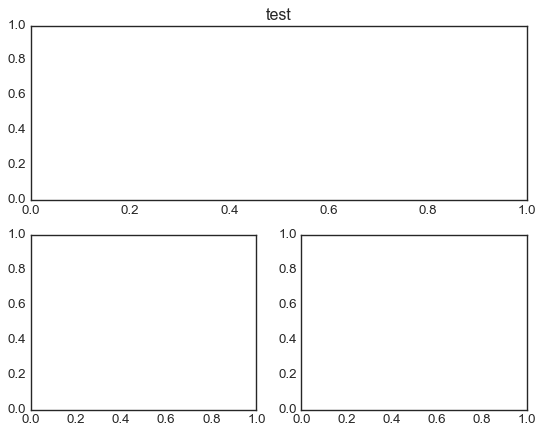

In [58]:
plt.subplot(211)
plt.title('test')
plt.subplot(2,2,3)
plt.subplot(2,2,4)

Text(0.5, 1.0, 'test1')

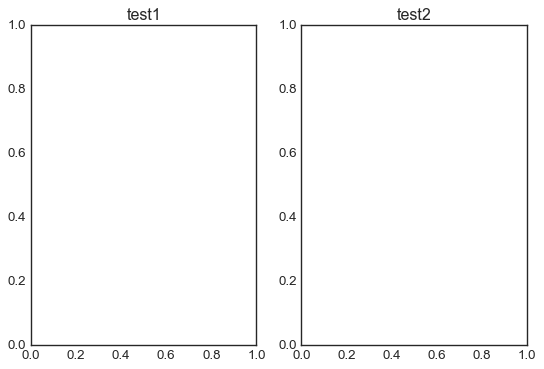

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))

ax2.set_title('test2')
ax1.set_title('test1')

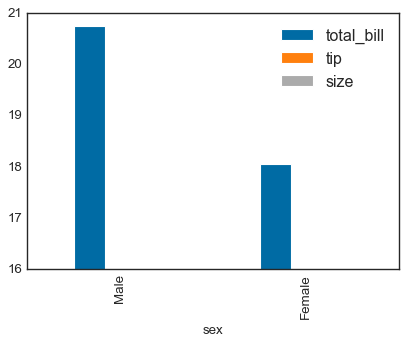

In [91]:
tips = sns.load_dataset('tips')

t = tips.groupby('sex').mean().plot(kind='bar', figsize=(6,4), ylim=(16,21))

### Recommendation

In [98]:
u_info = pd.read_csv('data/u.info', header = None, sep = ' ').set_index(1)

u_info

,0
1,
users,943
items,1682
ratings,100000


In [103]:
u_occupation = pd.read_csv('data/u.occupation', header = None)

u_occupation.head(3)

,0
0,administrator
1,artist
2,doctor


In [109]:
u_genre = pd.read_csv('data/u.genre', header = None, sep = '|').set_index(0)

u_genre.head(3)

,1
0,
unknown,0
Action,1
Adventure,2


In [116]:
u_user = pd.read_csv('data/u.user', header = None, sep = '|').rename(columns={0:'user id', 1:'age', 2:'gender', 3: 'ocuupation', 4 : 'zip code'})

u_user.head(3)

,user id,age,gender,ocuupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [119]:
u_item = pd.read_csv('data/u.item', sep = '|', encoding = 'latin1',
                     names= ['movie id', 'movie title', 'release date', 'video release date',
                              'IMDb URL','unknown','Action','Adventure','Animation',
                              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                              'Film-Noir','Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
                              'Thriller','War', 'Western'], header = None)
u_item.head(3)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
u_data = pd.read_csv('data/u.data', sep = '\t',
                     header = None, names = ['user id', 'item id', 'rating', 'timestamp'])
u_data.head(3)

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [125]:
recommendation = u_data.copy()
recommendation.drop(columns = 'timestamp', inplace = True)

In [131]:
# stack : column을 index로
# unstack : index를 column으로
recommendation.set_index(['user id', 'item id']).unstack()

rating                                               ...            \
item id   1    2    3    4    5    6    7    8    9    10    ... 1673 1674   
user id                                                      ...             
1          5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...  NaN  NaN   
2          4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN   
3          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5          4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  ...  NaN  NaN   
940        NaN  NaN  NaN  2.0  NaN  NaN  4.0  5.0  3.0  NaN  ...  NaN  NaN   
941        5.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   
942        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
943        NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  ...  NaN  NaN   

                                                 
item id 1675 1676 1677 1678 1679 1680 1681 1682  
user id                                          
1        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...      ...  ...  ...  ...  ...  ...  ...  ...  
939      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
940      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
941      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
942      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
943      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[943 rows x 1682 columns]

In [138]:
rec_basic = recommendation.pivot(index='user id', columns = 'item id', values = 'rating').fillna(0)

rec_corr = rec_basic.T.corr()

In [148]:
def close_persons(user_id, number):
    return rec_corr.loc[user_id].sort_values(ascending = False)[1:number+1]

In [149]:
close_persons(420, 5)

user id
558    0.415704
491    0.403269
131    0.376918
266    0.373825
590    0.364280
Name: 420, dtype: float64

In [163]:
index = rec_basic.loc[730][rec_basic.loc[730] > 0].index

In [164]:
u_item[u_item['movie id'].isin(index)].head(2)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [177]:
def close_persons(user_id, number=5):
    return rec_corr.loc[user_id].sort_values(ascending = False)[1:number+1].index

In [194]:
def my_movie(user_id):
    return set(u_item[u_item['movie id'].isin(rec_basic.loc[user_id][rec_basic.loc[user_id] > 0].index)]['movie id'].values)

In [195]:
close_persons(2)

Int64Index([701, 931, 460, 131, 104], dtype='int64', name='user id')

In [196]:
my_movie(701) & my_movie(558)

{19, 100, 124, 269, 275, 285, 286}

In [199]:
close_persons(1)

Int64Index([916, 738, 864, 457, 268], dtype='int64', name='user id')

In [203]:
temp = my_movie(916) & my_movie(738) & my_movie(864) & my_movie(457) & my_movie(268)

In [209]:
u_item[u_item['movie id'].isin(temp)]['movie id'].values

array([  1,   4,   7,  50,  56,  79,  82,  88,  91,  96,  97,  98, 100,
       117, 121, 144, 151, 161, 164, 168, 172, 173, 174, 176, 181, 183,
       186, 195, 203, 204, 209, 210, 222, 226, 227, 228, 229, 230, 234,
       235, 238, 257, 265, 380, 405, 423, 470, 474, 568, 655, 732],
      dtype=int64)

In [217]:
x = u_data[u_data['item id'].isin(temp)][u_data['user id'].isin(close_persons(1))]

x.groupby('item id').mean()['rating'].sort_values(ascending = False)[:5]

item id
50     5.0
174    5.0
176    4.8
172    4.8
98     4.6
Name: rating, dtype: float64

In [219]:
rec_corr = rec_corr.T.corr()

In [224]:
u_data.groupby('item id').count().sort_values('rating', ascending=False)

,user id,rating,timestamp
item id,,,
50,583,583,583
258,509,509,509
100,508,508,508
181,507,507,507
294,485,485,485
...,...,...,...
1576,1,1,1
1577,1,1,1
1348,1,1,1


In [227]:
u_item.rename({'movie id':'item id'}, axis = 1, inplace = True)

In [229]:
u_data.groupby('item id').count()[u_data.groupby('item id').count().rating > 500].index

Int64Index([50, 100, 181, 258], dtype='int64', name='item id')

In [231]:
u_item[u_item['item id'].isin(u_data.groupby('item id').count()[u_data.groupby('item id').count().rating > 500].index)]

,item id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
99,100,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
180,181,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
257,258,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [239]:
t = u_data[u_data['item id'].isin(u_item[u_item.Musical != 0]['item id'].values)]

t.groupby('item id')['rating'].mean().sort_values(ascending = False)[:5].index

Int64Index([132, 1203, 1458, 705, 209], dtype='int64', name='item id')

In [248]:
u_item[u_item['item id'].isin(t.groupby('item id')['rating'].mean().sort_values(ascending = False)[:5].index)]

,item id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
131,132,"Wizard of Oz, The (1939)",01-Jan-1939,NaN,http://us.imdb.com/M/title-exact?Wizard%20of%2...,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
208,209,This Is Spinal Tap (1984),01-Jan-1984,NaN,http://us.imdb.com/M/title-exact?This%20Is%20S...,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
704,705,Singin' in the Rain (1952),01-Jan-1952,NaN,http://us.imdb.com/M/title-exact?Singin'%20in%...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1202,1203,Top Hat (1935),01-Jan-1935,NaN,http://us.imdb.com/M/title-exact?Top%20Hat%20(...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1457,1458,"Damsel in Distress, A (1937)",01-Jan-1937,NaN,http://us.imdb.com/M/title-exact?Damsel%20in%2...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [259]:
from sklearn.datasets import load_iris

data = load_iris()

In [260]:
iris = pd.DataFrame(data.data, columns = data.feature_names)

iris1 = iris.copy()
iris1['target'] = data.target

iris1.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [272]:
iris2 = iris.copy()
target = pd.DataFrame(data.target, columns = ['target'])

In [275]:
iris = pd.concat([iris, target], axis=1)

In [280]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(iris, random_state=1, stratify = iris.target)

In [281]:
train.target.value_counts()

0    38
2    37
1    37
Name: target, dtype: int64

In [282]:
# Hold out
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.iloc[:, -1])

In [287]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=10, n_jobs=-1)

array([1.        , 1.        , 1.        , 1.        , 0.91666667,
       1.        , 1.        , 1.        , 1.        , 0.88888889])

In [288]:
cross_val_score(SVC(),  X_train, y_train, cv=10, n_jobs=-1)

array([1.        , 1.        , 1.        , 1.        , 0.91666667,
       0.90909091, 1.        , 1.        , 1.        , 1.        ])

In [289]:
cross_val_score(LogisticRegression(),  X_train, y_train, cv=10, n_jobs=-1)

array([0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ,
       0.90909091, 1.        , 1.        , 1.        , 0.88888889])

#### Dummy classifier

머신러닝을 사용하지 않고 예측